<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Best_Updated_with_deviation2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Deviation for Each Column (Hourly Resampled Data) - Book2.xlsx:
Radiation_GHI          177.108839
Radiation_GII          215.273260
Radiation_GHI_Acc        1.234254
Radiation_GII_Acc        1.430487
Wind_Speed               0.091836
Wind_Direction         100.789855
Humidity                 0.077804
Ambient_Temperature      1.945016
Module_Temperature       7.959692
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.084067
dtype: float64 



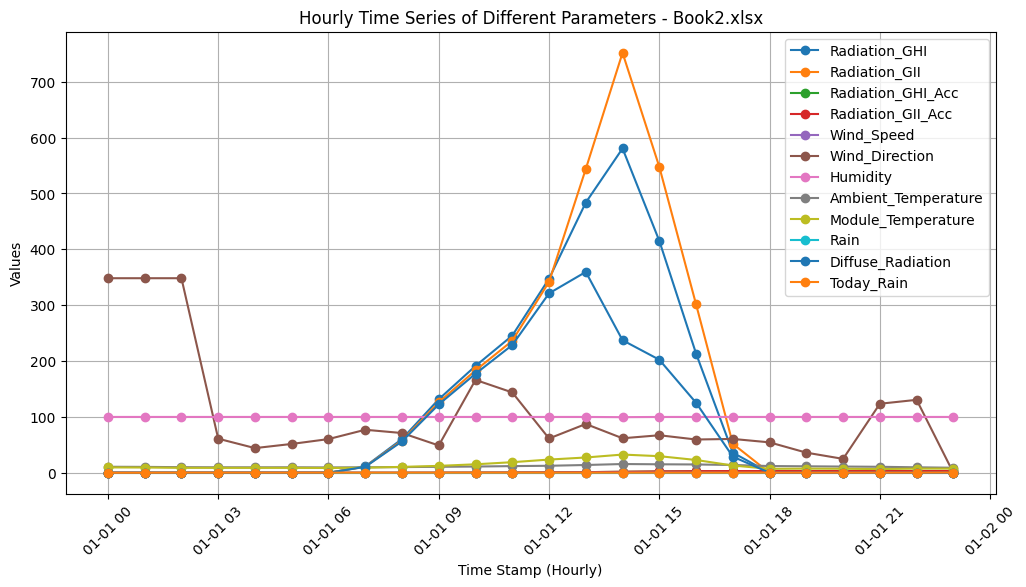

Standard Deviation for Each Column (Hourly Resampled Data) - Book3.xlsx:
Radiation_GHI          151.698536
Radiation_GII          177.461949
Radiation_GHI_Acc        1.080438
Radiation_GII_Acc        1.217760
Wind_Speed               0.072424
Wind_Direction         106.638275
Humidity                 3.833266
Ambient_Temperature      1.775497
Module_Temperature       6.842590
Rain                     0.000000
Diffuse_Radiation        0.000000
Today_Rain               0.112557
dtype: float64 



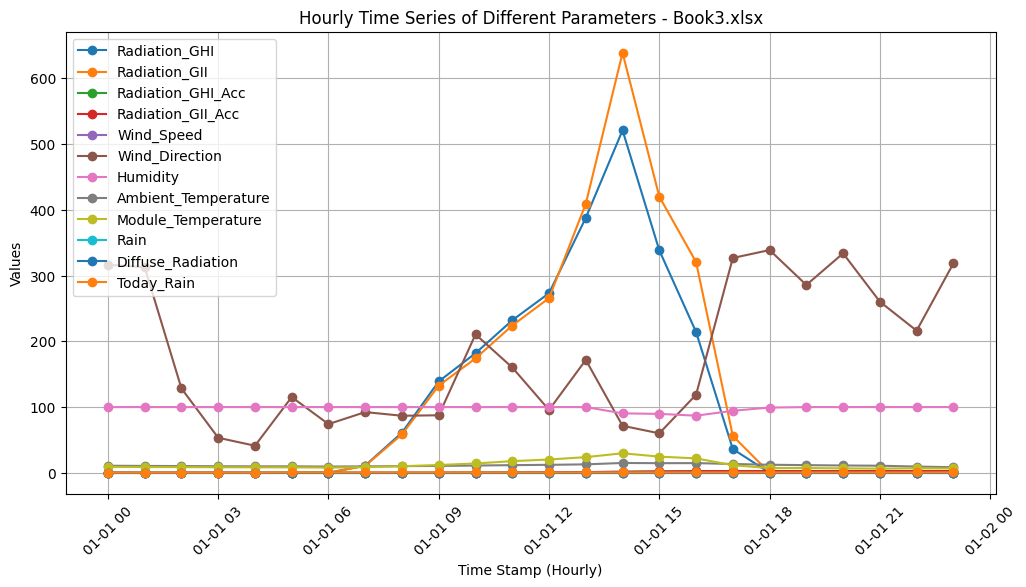

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file
def process_file(file_path, file_name):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    df_resampled_1.fillna(0, inplace=True)
    df_resampled_2.fillna(0, inplace=True)

    # Calculate standard deviation for each column separately
    std_devs = df_resampled.std()

    # Print standard deviation values
    print(f"Standard Deviation for Each Column (Hourly Resampled Data) - {file_name}:")
    print(std_devs, "\n")

    # Plot each resampled column against Time_Stamp
    plt.figure(figsize=(12, 6))
    for col in numeric_columns:
        plt.plot(df_resampled.index, df_resampled[col], label=col, marker='o', linestyle="-")

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Hourly Time Series of Different Parameters - {file_name}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Process both files
process_file("/content/Book2.xlsx", "Book2.xlsx")
process_file("/content/Book3.xlsx", "Book3.xlsx")

Standard Deviation for Each Column in Book2.xlsx:
Radiation_GHI          177.108839
Radiation_GII          215.273260
Radiation_GHI_Acc        1.234254
Radiation_GII_Acc        1.430487
Wind_Speed               0.091836
Wind_Direction         100.789855
Humidity                 0.077804
Ambient_Temperature      1.945016
Module_Temperature       7.959692
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.084067
dtype: float64 

Standard Deviation for Each Column in Book3.xlsx:
Radiation_GHI          151.698536
Radiation_GII          177.461949
Radiation_GHI_Acc        1.080438
Radiation_GII_Acc        1.217760
Wind_Speed               0.072424
Wind_Direction         106.638275
Humidity                 3.833266
Ambient_Temperature      1.775497
Module_Temperature       6.842590
Rain                     0.000000
Diffuse_Radiation        0.000000
Today_Rain               0.112557
dtype: float64 

Standard Deviation of the Difference Between the T

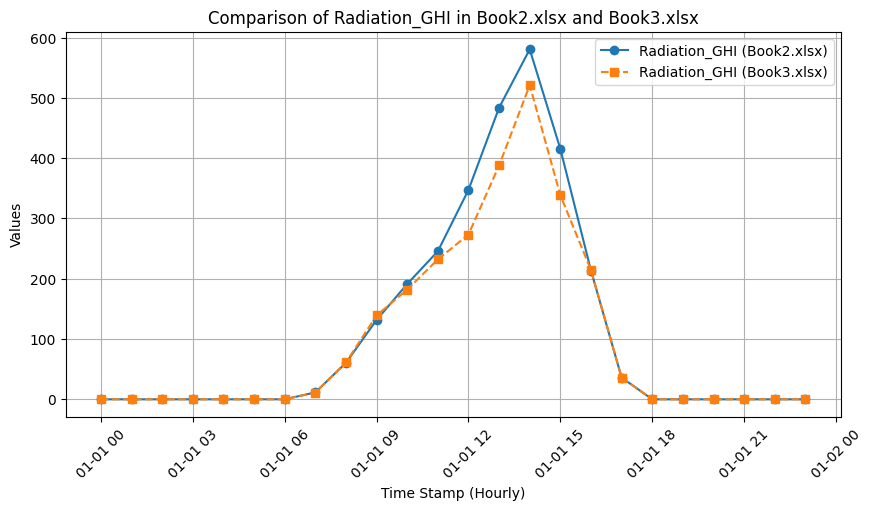

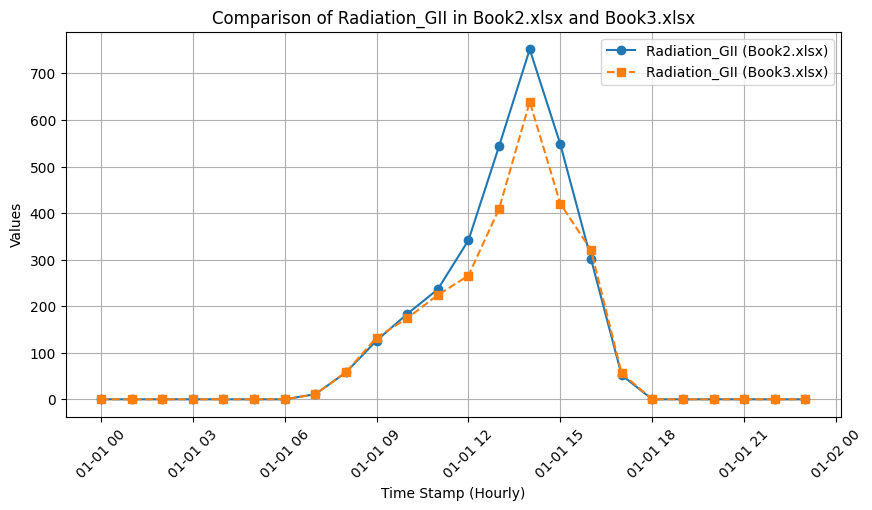

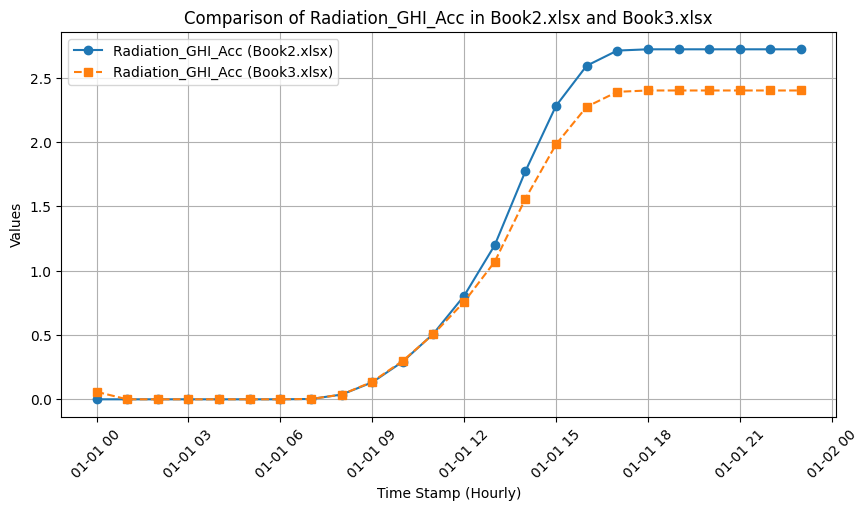

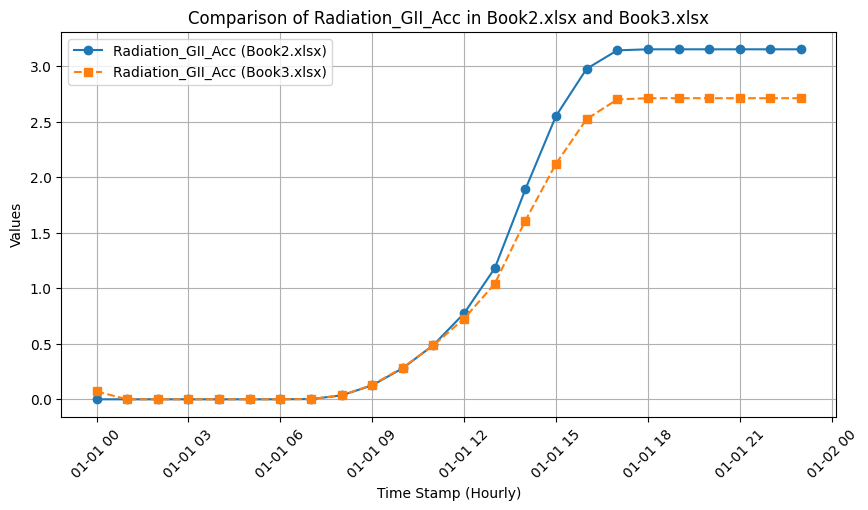

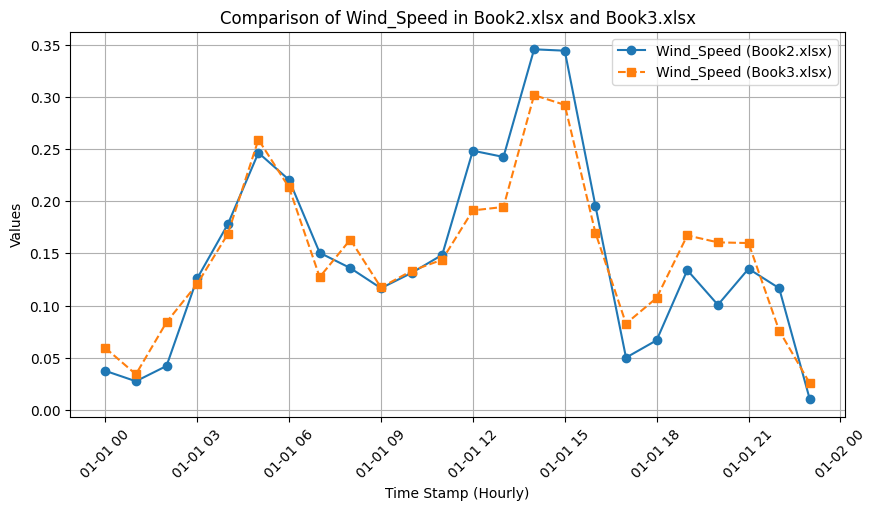

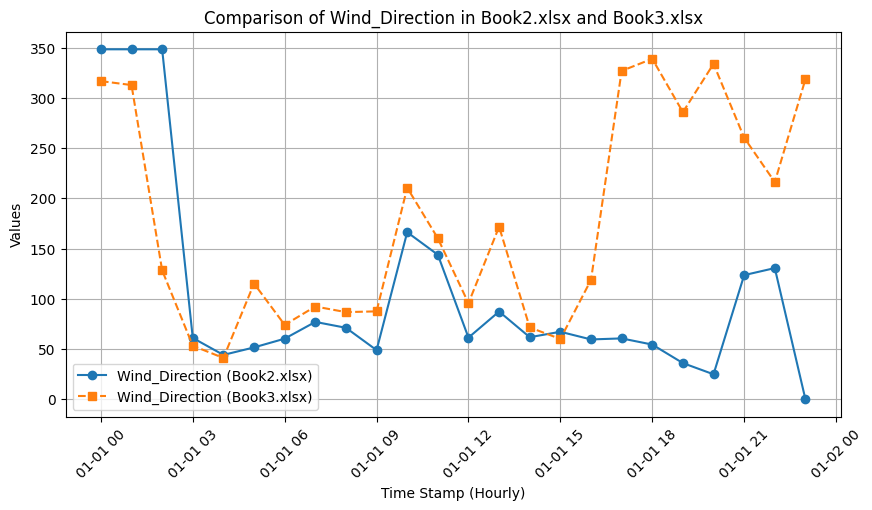

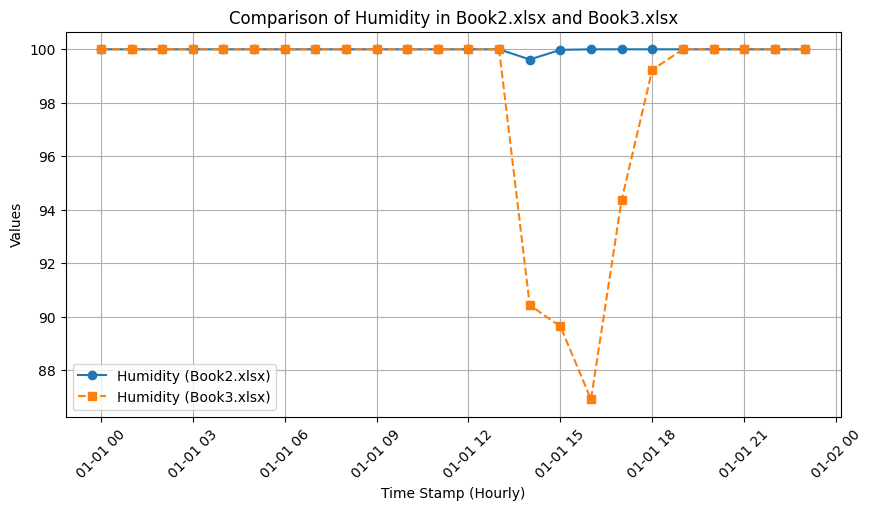

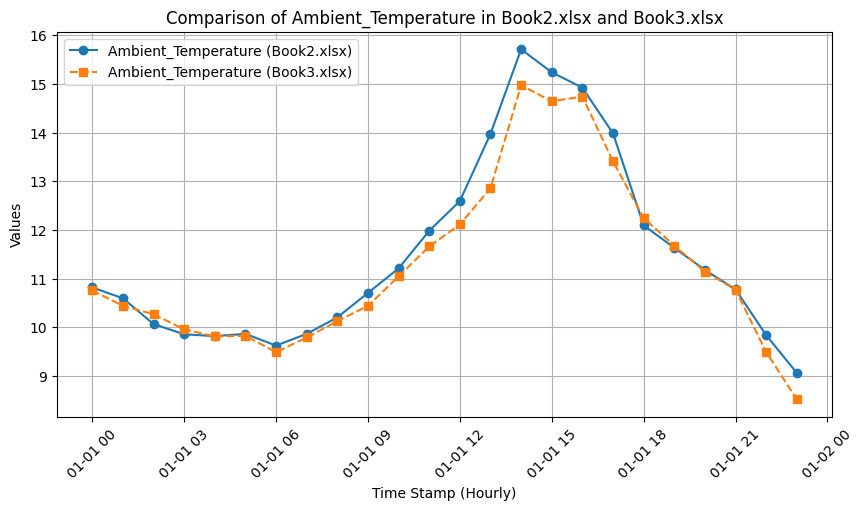

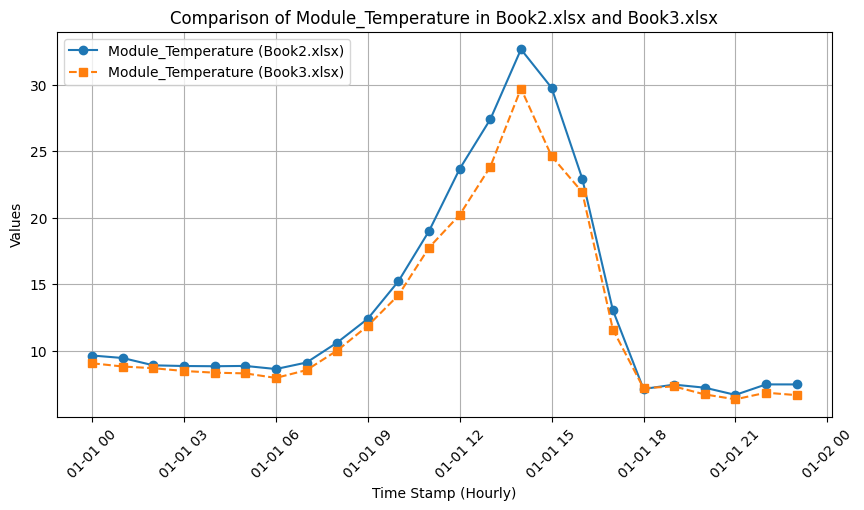

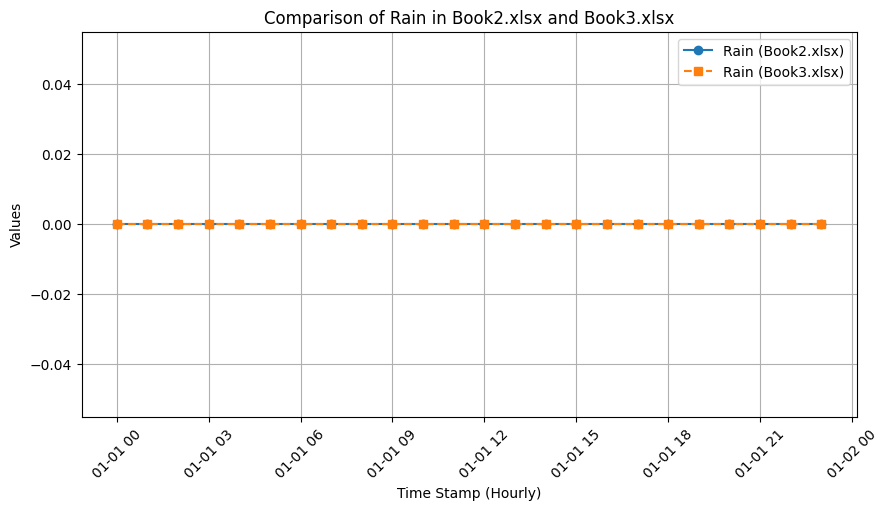

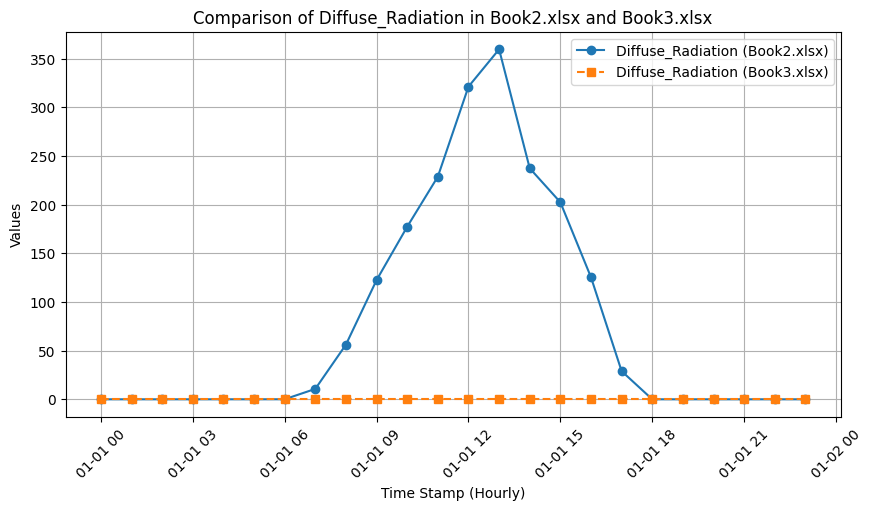

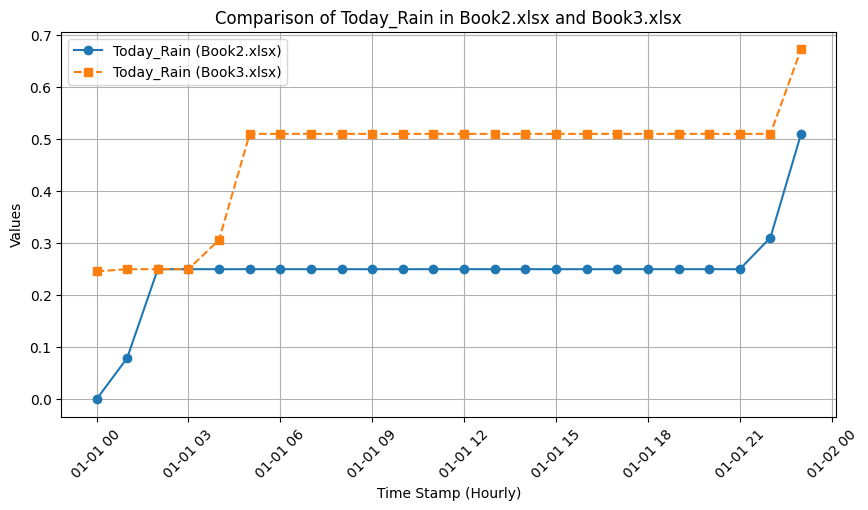

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate standard deviation for each column separately
std_dev_1 = df_resampled_1[common_columns].std()
std_dev_2 = df_resampled_2[common_columns].std()

# Calculate standard deviation of the difference between both datasets
std_dev_diff = (df_resampled_1[common_columns] - df_resampled_2[common_columns]).std()

# Print standard deviation values
print("Standard Deviation for Each Column in Book2.xlsx:")
print(std_dev_1, "\n")

print("Standard Deviation for Each Column in Book3.xlsx:")
print(std_dev_2, "\n")

print("Standard Deviation of the Difference Between the Two Files Column-wise:")
print(std_dev_diff, "\n")

# Plot the same column from both files on the same graph
for col in common_columns:
    plt.figure(figsize=(10, 5))

    plt.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    plt.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Comparison of {col} in Book2.xlsx and Book3.xlsx")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])
    df = df.drop_duplicates(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)



    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Cleaned_Book2.xlsx")
df_resampled_2 = process_file("/content/Cleaned_Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

df_resampled_1.fillna(0, inplace=True)
df_resampled_2.fillna(0, inplace=True)
# Calculate the absolute deviation (difference between values)
df_deviation = abs(df_resampled_1[common_columns] - df_resampled_2[common_columns])

# Calculate standard deviation of the deviations
std_dev_between_graphs = df_deviation.std()

# Print standard deviation of deviations
print("Standard Deviation of the Differences Between the Two Files Column-wise:")
print(std_dev_between_graphs, "\n")

# Plot original graphs + deviation in the same subplot
for col in common_columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot first dataset
    ax.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    ax.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    # Plot deviation
    ax.plot(df_deviation.index, df_deviation[col], marker='d', linestyle=":", color="red", label=f"Deviation in {col}")

    # Adding titles and labels
    ax.set_xlabel("Time Stamp (Hourly)")
    ax.set_ylabel("Values / Deviation")
    ax.set_title(f"Comparison and Deviation for {col}")
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.show()


ValueError: Length mismatch: Expected axis has 0 elements, new values have 13 elements

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Cleaned_Book2.xlsx")
df.head()

,Time Stamp,Radiation GHI,Radiation GII,Radiation GHI Acc,Radiation GII \nAcc,Wind Speed,WInd \nDirection,Humidity,Ambient Temperature,Module Temperature,Rain,Diffu. Radiation,Today \nRain
0,NaT,(w/m2),(w/m2),(kwh/m2),(kwh/m2),(m/s),(Degree),(%),(Degree),(Degree),(mm),(w/m2),(mm)
1,2025-01-01 00:00:02,0,0,0,0,0.16,348.31,100,11.01,9.85,0,0,0
2,2025-01-01 00:01:02,0,0,0,0,0.04,348.31,100,11.03,9.89,0,0,0
3,2025-01-01 00:02:02,0,0,0,0,0.16,348.31,100,10.98,9.85,0,0,0
4,2025-01-01 00:03:02,0,0,0,0,0.08,348.31,100,10.98,9.83,0,0,0


In [ ]:
df = df.dropna(subset=["Time Stamp"])
df.head()
print(df)

               Time Stamp  Radiation GHI  Radiation GII  Radiation GHI   Acc  \
0    -9223372036854775808     113.126609     131.289051              1.19375   
1     1735689602000000000       0.000000       0.000000              0.00000   
2     1735689662000000000       0.000000       0.000000              0.00000   
3     1735689722000000000       0.000000       0.000000              0.00000   
4     1735689782000000000       0.000000       0.000000              0.00000   
...                   ...            ...            ...                  ...   
1438  1735775822000000000       0.000000       0.000000              2.72000   
1439  1735775882000000000       0.000000       0.000000              2.72000   
1440  1735775942000000000       0.000000       0.000000              2.72000   
1441 -9223372036854775808       2.716878       3.153071              1.19375   
1442 -9223372036854775808     113.203229     131.377972              1.19375   

      Radiation GII   Acc  Wind Speed  

In [ ]:
print(df.to_string())

               Time Stamp  Radiation GHI  Radiation GII  Radiation GHI   Acc  Radiation GII   Acc  Wind Speed  WInd  Direction    Humidity  Ambient Temperature  Module Temperature  Rain  Diffu. Radiation  Today  Rain
0    -9223372036854775808     113.126609     131.289051              1.19375             1.347479    0.147928       105.652151   99.983243            11.479433           13.428384   0.0         77.872938     0.245826
1     1735689602000000000       0.000000       0.000000              0.00000             0.000000    0.160000       348.310000  100.000000            11.010000            9.850000   0.0          0.000000     0.000000
2     1735689662000000000       0.000000       0.000000              0.00000             0.000000    0.040000       348.310000  100.000000            11.030000            9.890000   0.0          0.000000     0.000000
3     1735689722000000000       0.000000       0.000000              0.00000             0.000000    0.160000       348.310000  100.

In [ ]:
print(df.isnull().sum())

Time Stamp             0
Radiation GHI          0
Radiation GII          0
Radiation GHI   Acc    0
Radiation GII   Acc    0
Wind Speed             0
WInd  Direction        0
Humidity               0
Ambient Temperature    0
Module Temperature     0
Rain                   0
Diffu. Radiation       0
Today  Rain            0
dtype: int64


In [ ]:
print(df.std())

Time Stamp             4.993455e+17
Radiation GHI          1.776554e+02
Radiation GII          2.172374e+02
Radiation GHI   Acc    1.208908e+00
Radiation GII   Acc    1.401233e+00
Wind Speed             1.242298e-01
WInd  Direction        1.283885e+02
Humidity               1.619065e-01
Ambient Temperature    1.951027e+00
Module Temperature     7.897891e+00
Rain                   0.000000e+00
Diffu. Radiation       1.139901e+02
Today  Rain            8.848320e-02
dtype: float64


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Cleaned_Book2.xlsx"
df = pd.read_excel(file_path)

# Clean column names (remove newlines and spaces)
df.columns = df.columns.str.replace(r'\n', ' ', regex=True).str.strip()

# Convert numeric columns to float64
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert invalid values to NaN

# Fill missing values with column mean (only numeric columns)
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Verify data types
print(df.dtypes)

# Compute standard deviation
std_values = df.std()
print(std_values)

Time Stamp               int64
Radiation GHI          float64
Radiation GII          float64
Radiation GHI   Acc    float64
Radiation GII   Acc    float64
Wind Speed             float64
WInd  Direction        float64
Humidity               float64
Ambient Temperature    float64
Module Temperature     float64
Rain                   float64
Diffu. Radiation       float64
Today  Rain            float64
dtype: object
Time Stamp             4.993455e+17
Radiation GHI          1.776554e+02
Radiation GII          2.172374e+02
Radiation GHI   Acc    1.208908e+00
Radiation GII   Acc    1.401233e+00
Wind Speed             1.242298e-01
WInd  Direction        1.283885e+02
Humidity               1.619065e-01
Ambient Temperature    1.951027e+00
Module Temperature     7.897891e+00
Rain                   0.000000e+00
Diffu. Radiation       1.139901e+02
Today  Rain            8.848320e-02
dtype: float64


In [ ]:
import pandas as pd

# Load the cleaned Excel file
file_path = "Cleaned_Book2.xlsx"
df = pd.read_excel(file_path)

In [ ]:
print(df.isnull().sum())

Time Stamp              3
Radiation GHI           0
Radiation GII           0
Radiation GHI   Acc     2
Radiation GII  \nAcc    2
Wind Speed              0
WInd \nDirection        0
Humidity                2
Ambient Temperature     0
Module Temperature      0
Rain                    2
Diffu. Radiation        0
Today \nRain            2
dtype: int64


In [ ]:
# Iterate through columns and calculate mean for numeric columns only
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]): # Check if the column's data type is numeric
        df[col].fillna(df[col].mean(), inplace=True) # Calculate and fill NaNs with mean for numeric columns only

<ipython-input-2-71e33fe93b12>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()
<ipython-input-2-71e33fe93b12>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


Standard Deviation of the Differences Between the Two Files Column-wise:
Radiation_GHI           29.234366
Radiation_GII           43.235858
Radiation_GHI_Acc        0.149939
Radiation_GII_Acc        0.208779
Wind_Speed               0.018435
Wind_Direction         109.927591
Humidity                 3.797537
Ambient_Temperature      0.278361
Module_Temperature       1.289801
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.082772
dtype: float64 



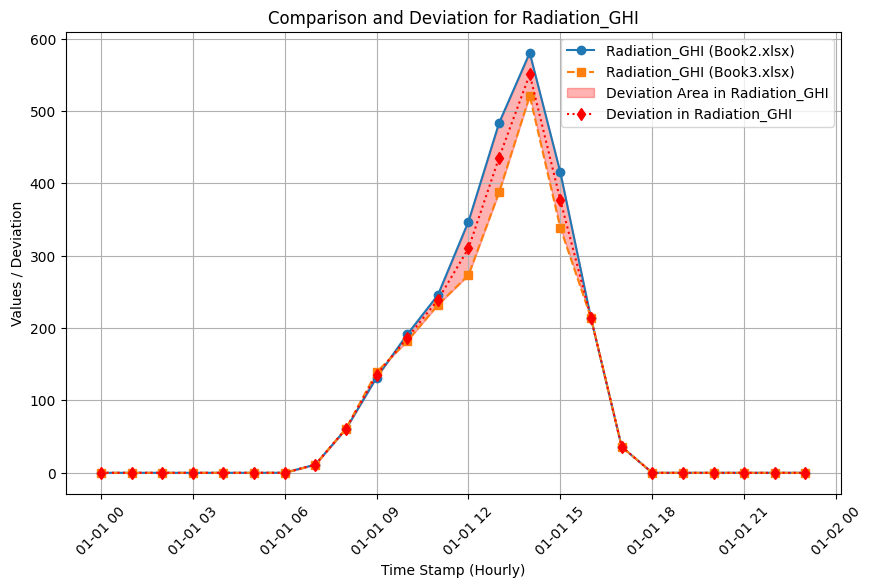

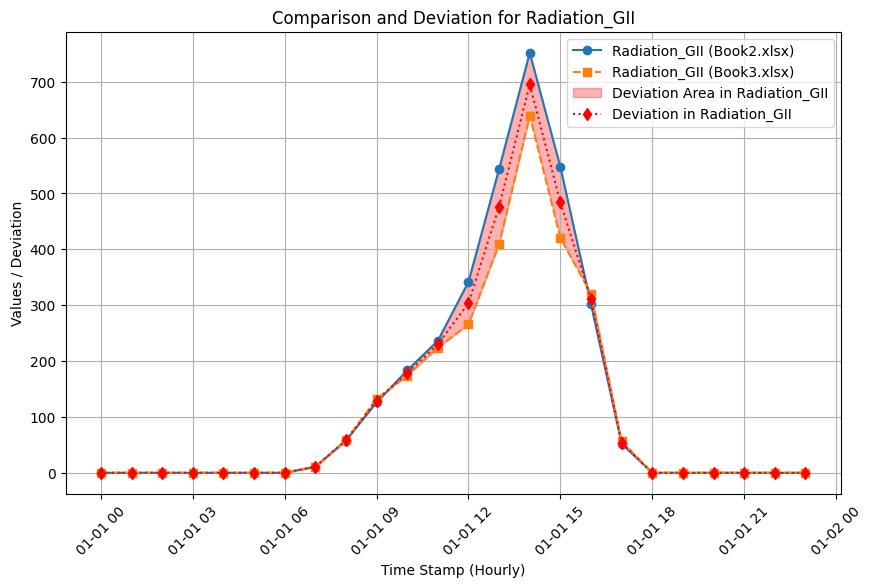

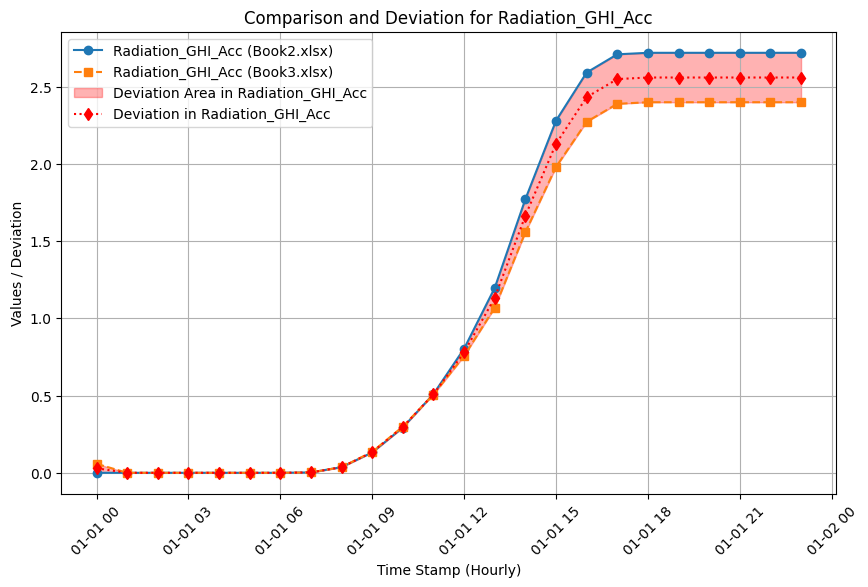

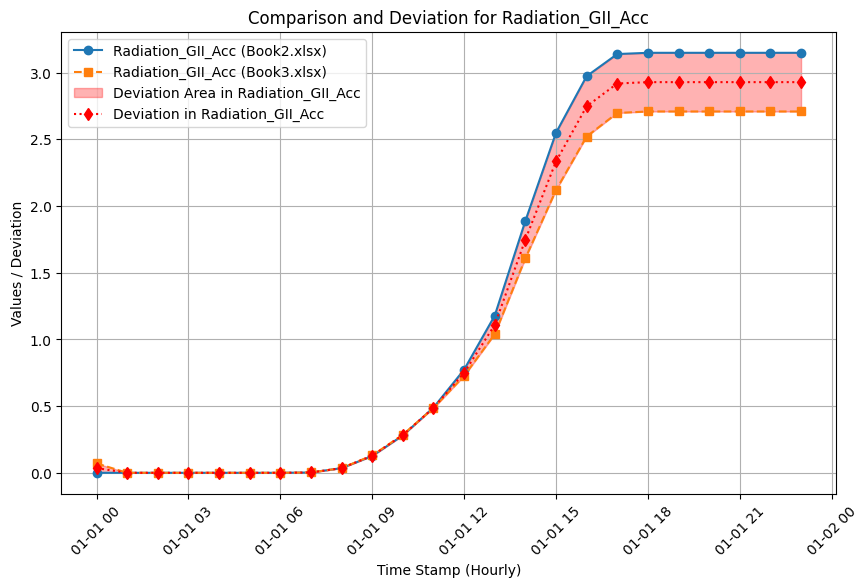

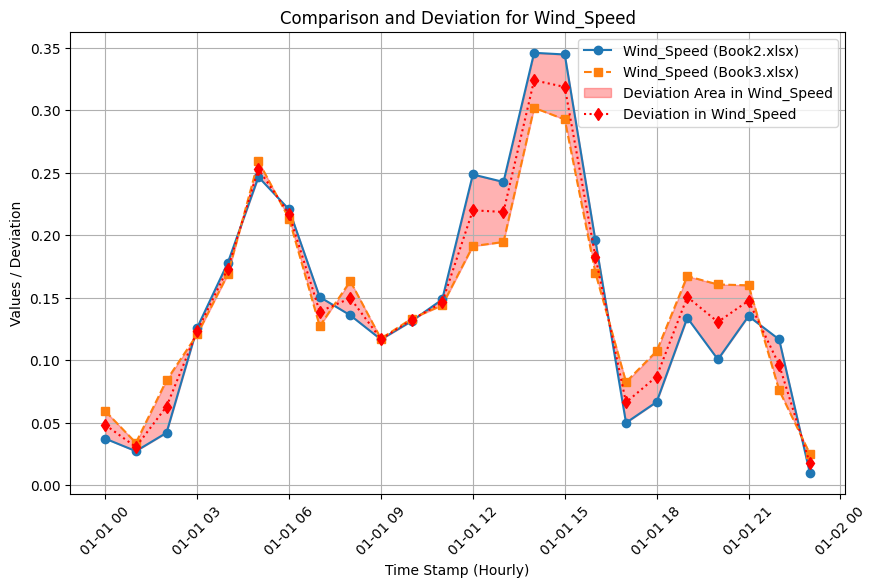

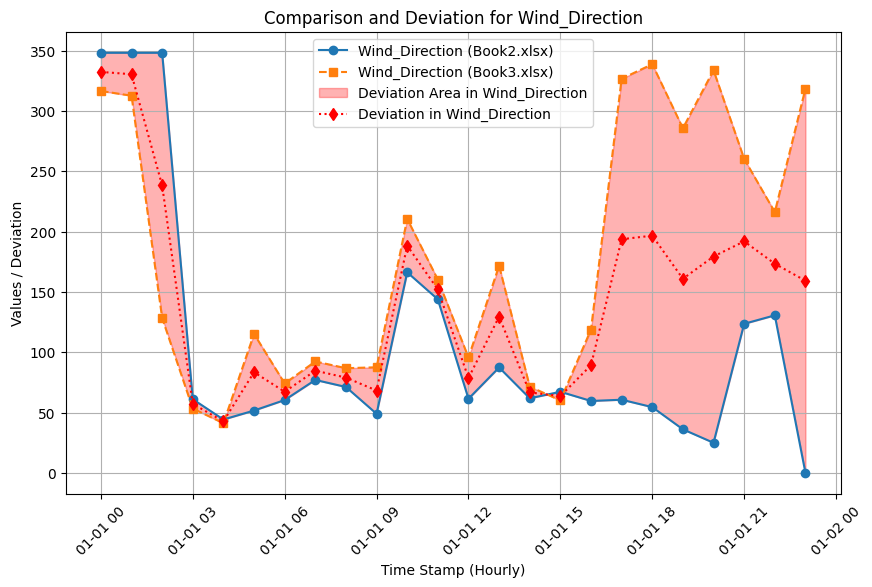

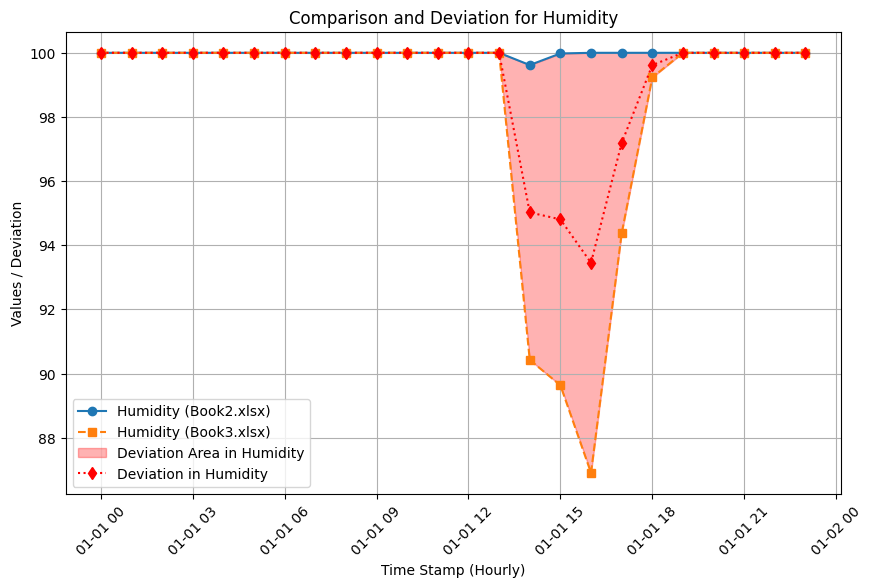

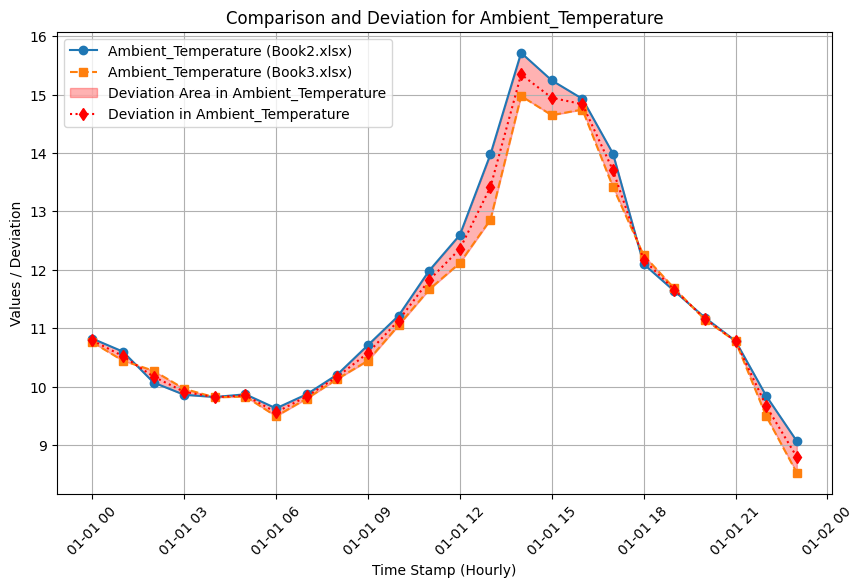

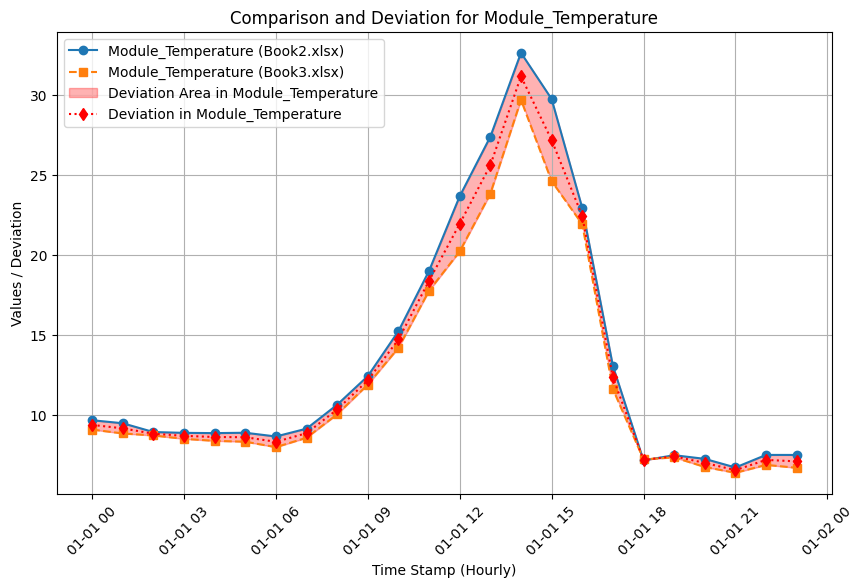

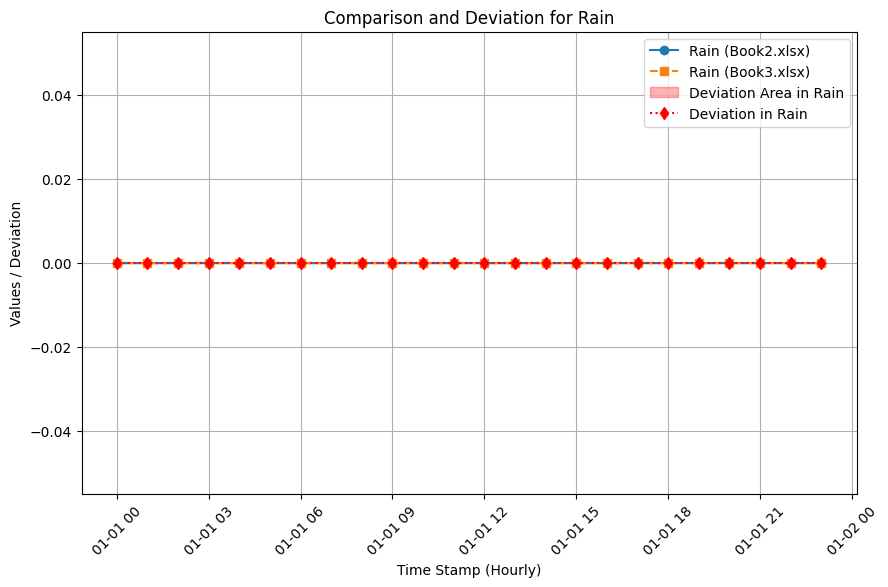

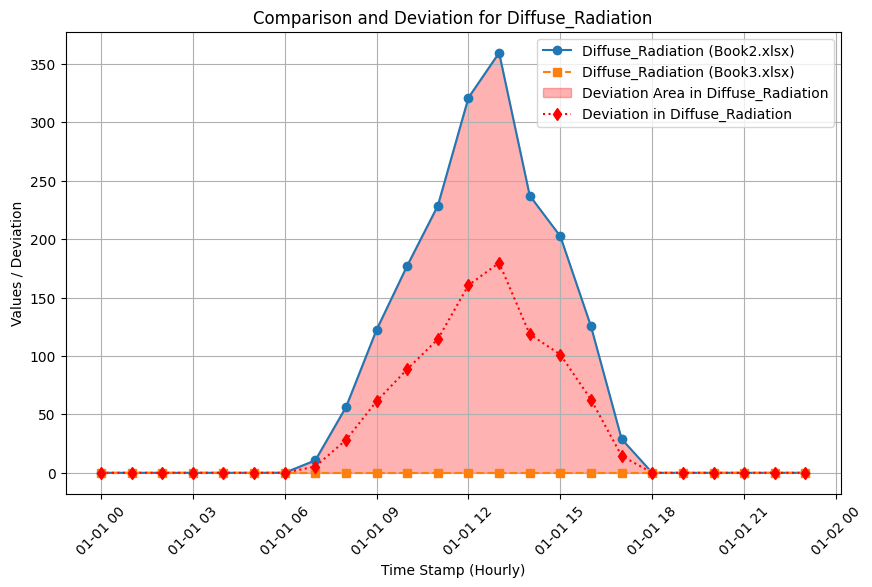

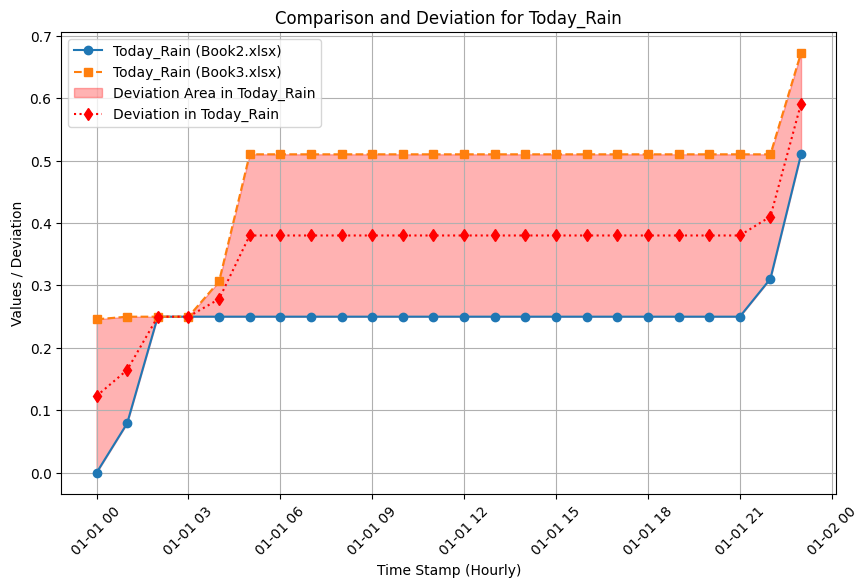

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def process_file(file_path):
    # Load the Excel file, skipping the first row (units)
    df = pd.read_excel(file_path, skiprows=1)

    # Standardize column names by stripping spaces and newlines
    df.columns = [
        "Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
        "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
        "Ambient_Temperature", "Module_Temperature", "Rain",
        "Diffuse_Radiation", "Today_Rain"
    ]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values and duplicates
    df = df.dropna(subset=["Time_Stamp"]).drop_duplicates(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("H").mean()

    return df_resampled

# File paths
file_path_1 = "Book2.xlsx"
file_path_2 = "Book3.xlsx"

# Process both files
df_resampled_1 = process_file(file_path_1)
df_resampled_2 = process_file(file_path_2)

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Fill NaN values with 0
df_resampled_1.fillna(0, inplace=True)
df_resampled_2.fillna(0, inplace=True)

# Calculate deviation
df_deviation = abs(df_resampled_1[common_columns] - df_resampled_2[common_columns])

# Compute standard deviation of deviations
std_dev_between_graphs = df_deviation.std()

# Print standard deviation results
print("Standard Deviation of the Differences Between the Two Files Column-wise:")
print(std_dev_between_graphs, "\n")

# Plot original graphs + deviation as shaded area with deviation line
for col in common_columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot first dataset
    ax.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    ax.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    # Compute center line for deviation
    mean_line = (df_resampled_1[col] + df_resampled_2[col]) / 2

    # Fill area between Book2 and Book3 data to represent deviation
    ax.fill_between(df_resampled_1.index, df_resampled_1[col], df_resampled_2[col], color='red', alpha=0.3, label=f"Deviation Area in {col}")

    # Plot deviation centered within Book2 and Book3 curves
    ax.plot(df_deviation.index, mean_line, marker='d', linestyle=":", color="red", label=f"Deviation in {col}")

    # Adding titles and labels
    ax.set_xlabel("Time Stamp (Hourly)")
    ax.set_ylabel("Values / Deviation")
    ax.set_title(f"Comparison and Deviation for {col}")
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.show()